Кумакшев Феликс Владимирович ; ТФэ-01-21

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
# Исходные данные 
effeckt_t = 0.88
effeckt_k = 0.85
effeckt_kc = 1
t_a = 0
m = 0.25
t_c = np.array([400,500,600,700,800,900,1200,1400])
Cp = 1200

In [ ]:
tau = ((t_c) + 273.15)/((t_a) + 273.15)
E_max = (tau * effeckt_t * effeckt_k) ** (1/m)
shag = (E_max )/1000

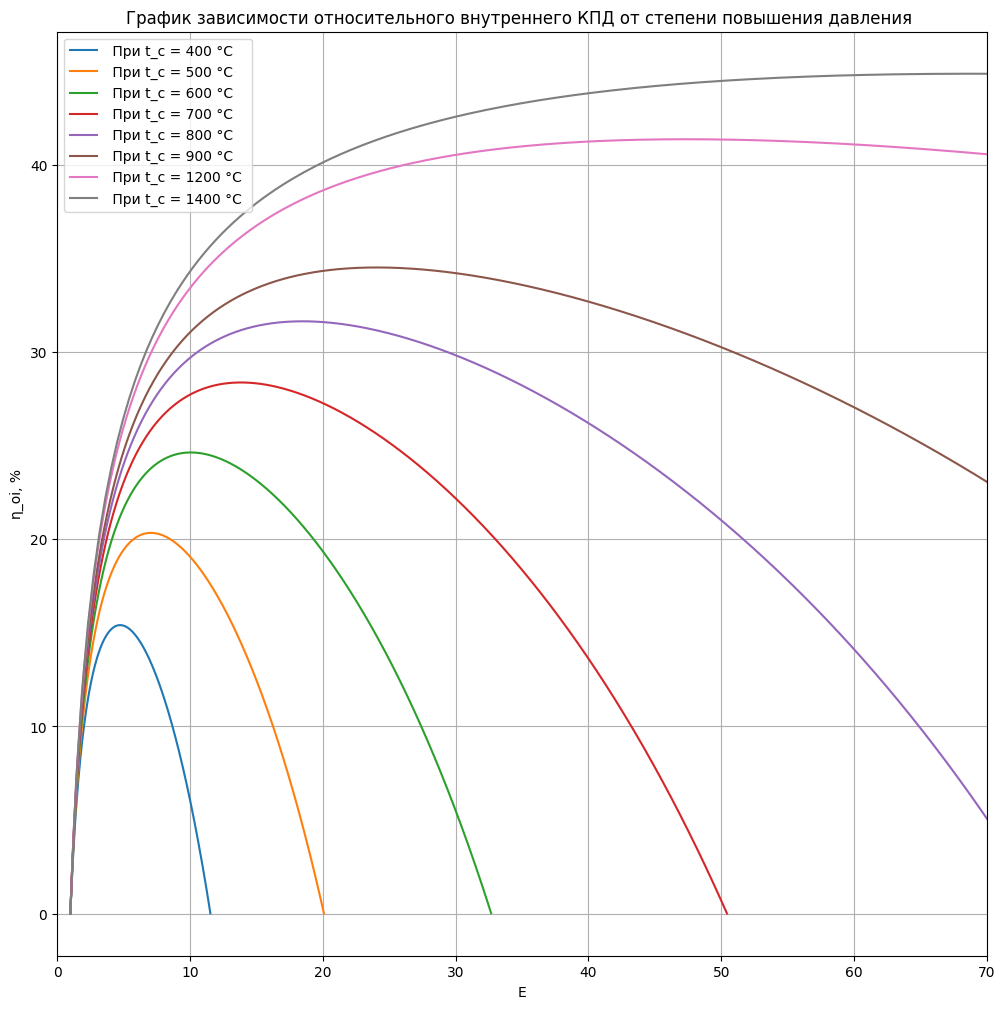

In [46]:
fig, graf = plt.subplots(1, 1, figsize=(12, 12))

for i in range(0,8,1):
 efficiency = []
 eps = []
    
 for E in np.arange(1,E_max[i],shag[i]):
  eps_value = E 
  num_1 = tau[i] * effeckt_t * (1 - E ** (-m)) 
  num_2 = (E ** m - 1) / effeckt_k
  denum = tau[i] - 1 - (E ** m - 1) / effeckt_k
  efficiency_value = (num_1 - num_2) / denum
  efficiency.append(efficiency_value*100)
  eps.append(eps_value)
     
 graf.set_title("График зависимости относительного внутреннего КПД от степени повышения давления ")
 graf.set_xlabel("E")
 graf.set_ylabel("η_oi, %")
 graf.set_xlim(0, 70)
 graf.plot(eps,efficiency, label = f" При t_c = {t_c[i]} °C ")
    
graf.grid()
graf.legend();

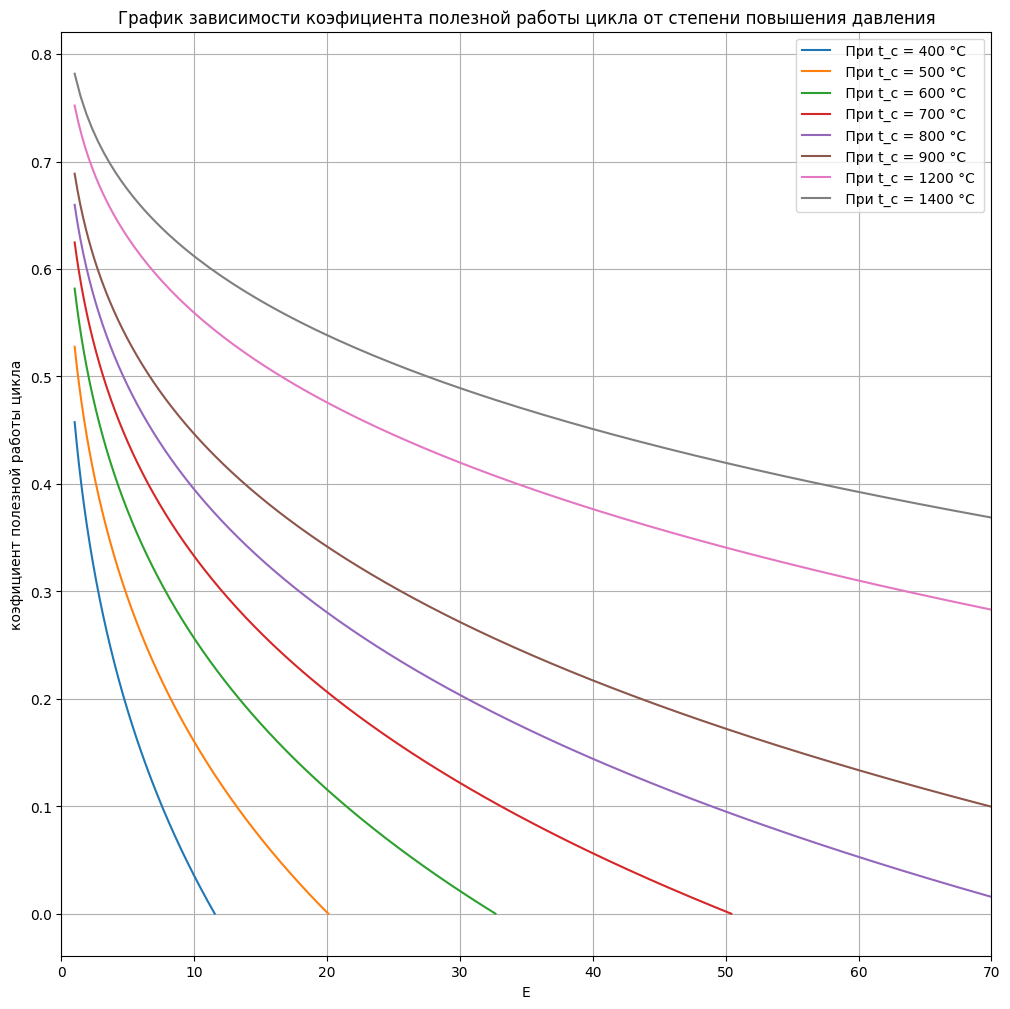

In [47]:
fig, graf = plt.subplots(1, 1, figsize=(12, 12))

for i in range(0,8,1):
 work_coefficient = []
 eps = []
    
 for E in np.arange(1,E_max[i],shag[i]):
  eps_value = (E) 
  num = eps_value ** m 
  denum = tau[i] * effeckt_t * effeckt_k
  work_coefficient_value = 1 - num/denum
  work_coefficient.append(work_coefficient_value)
  eps.append(eps_value)
     
 graf.set_title("График зависимости коэфициента полезной работы цикла от степени повышения давления")
 graf.set_xlabel("E")
 graf.set_ylabel("коэфициент полезной работы цикла")
 graf.set_xlim(0, 70)
 graf.plot(eps,work_coefficient, label = f" При t_c = {t_c[i]} °C ")
    
graf.grid()
graf.legend();
    

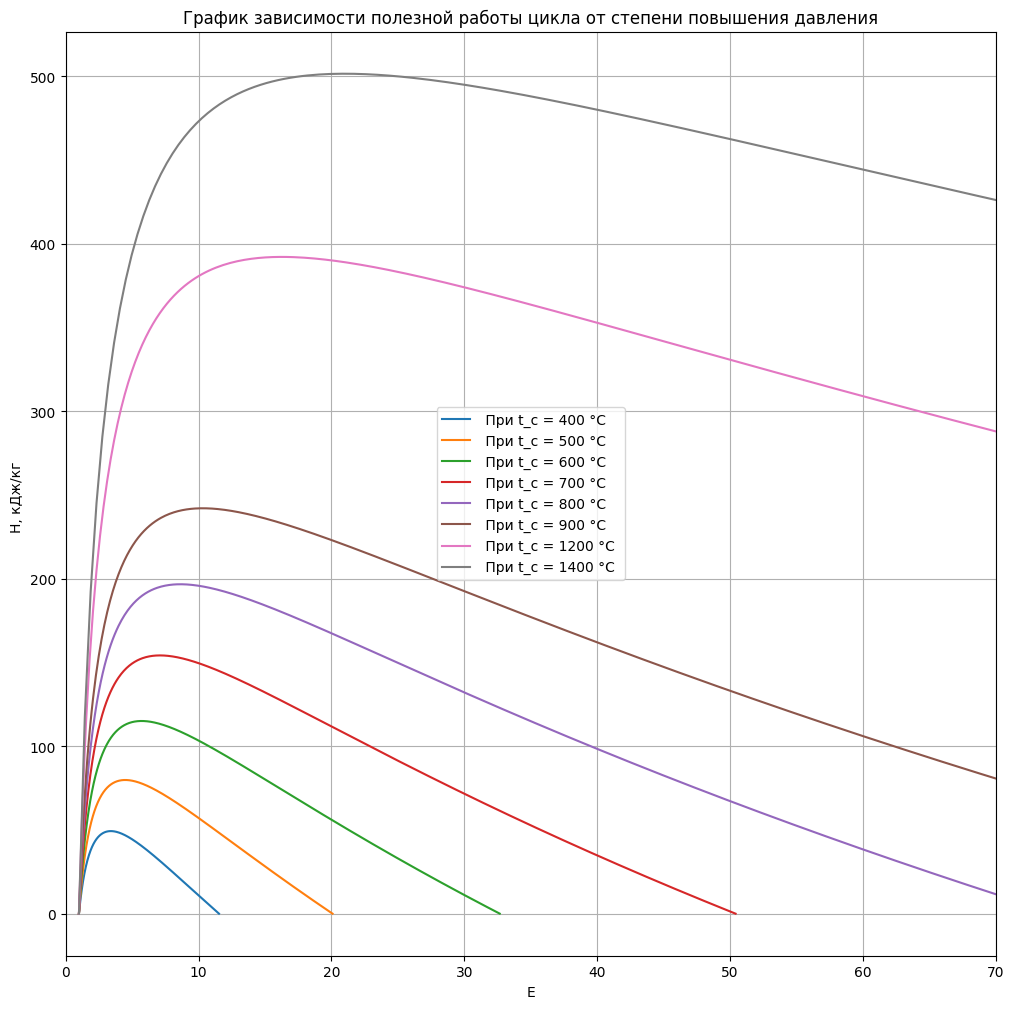

In [48]:
fig, graf = plt.subplots(1, 1, figsize=(12, 12))

for i in range(0,8,1):
 H = []
 eps = []
    
 for E in np.arange(1,E_max[i],shag[i]):
  eps_value = (E) 
  H_t = Cp * (t_c[i] +273.15) * (1 - E ** (-m)) * effeckt_t
  H_k = Cp * (t_a +273.15) * ((E ** m) - 1) / effeckt_k
  H_value = (H_t - H_k)/1000
  H.append(H_value)
  eps.append(eps_value)
     
 graf.set_title("График зависимости полезной работы цикла от степени повышения давления")
 graf.set_xlabel("E")
 graf.set_ylabel("H, кДж/кг ")
 graf.set_xlim(0, 70)
 graf.plot(eps,H, label = f" При t_c = {t_c[i]} °C ")
    
graf.grid()
graf.legend();

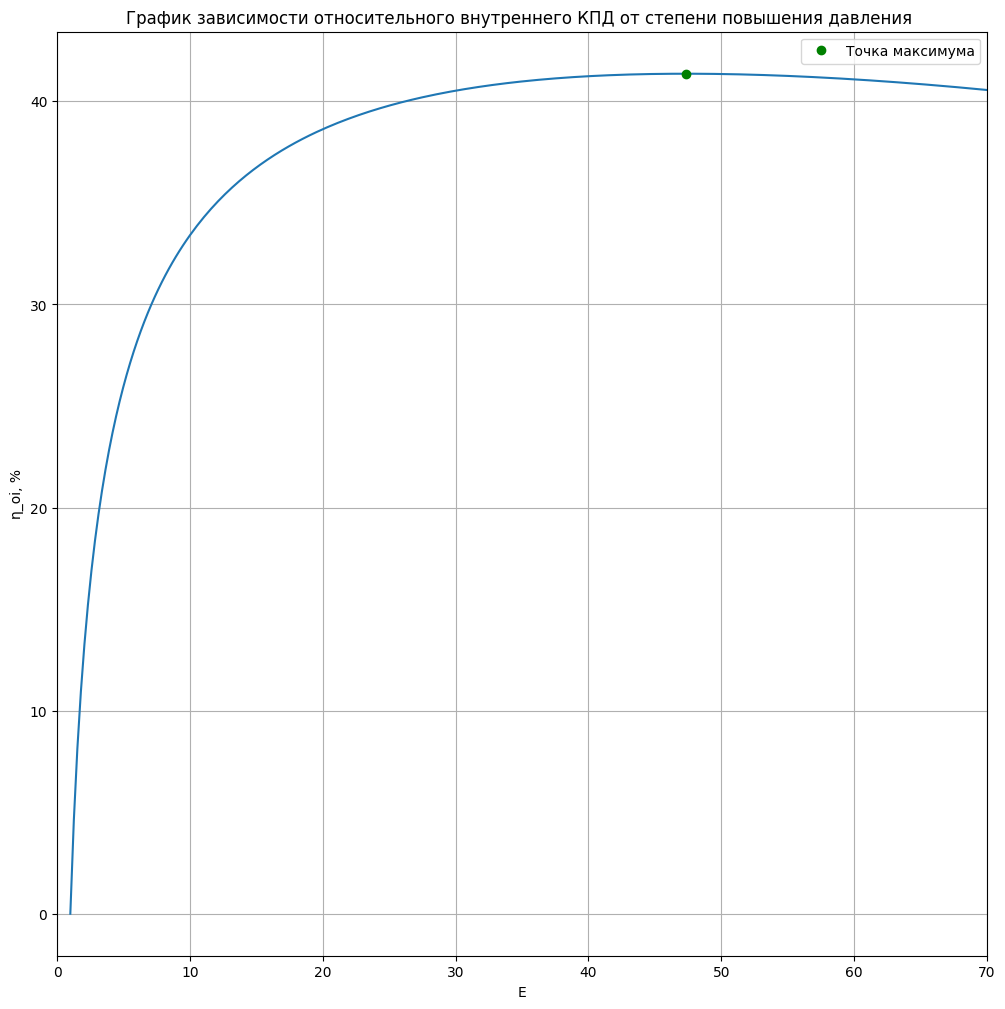

In [49]:
# Определения точки максимума на графике 
# зависимости относительного внутреннего КПД от степени повышения давления
E_max_1200 = E_max[6]
shag_1200 = shag[6]
tau_1200 = tau[6]


efficiency = []
eps = []
efficiency_opt = 0

def efficiency_for_opt (E):
    num_1 = tau_1200 * effeckt_t * (1 - E ** (-m)) 
    num_2 = (E ** m - 1) / effeckt_k
    denum = tau_1200- 1 - (E ** m - 1) / effeckt_k
    efficiency_value = (num_1 - num_2) / denum
    return 1 - efficiency_value
for E in np.arange(1,E_max_1200,shag_1200):
    eps_value = E 
    num_1 = tau_1200 * effeckt_t * (1 - E ** (-m)) 
    num_2 = (E ** m - 1) / effeckt_k
    denum = tau_1200 - 1 - (E ** m - 1) / effeckt_k
    efficiency_value = (num_1 - num_2) / denum
    efficiency.append(efficiency_value*100)
    eps.append(eps_value)
    
bounds = ([0.1,1])
opt = minimize (efficiency_for_opt,x0 = 0.1, tol = 1e-8)
eps_opt = opt.x
efficiency_opt = 1 - efficiency_for_opt(eps_opt)

fig, graf = plt.subplots(1, 1, figsize=(12, 12))
graf.set_title("График зависимости относительного внутреннего КПД от степени повышения давления ")
graf.set_xlabel("E")
graf.set_ylabel("η_oi, %")
graf.set_xlim(0, 70)
graf.plot(eps,efficiency)
graf.plot(eps_opt,efficiency_opt *100, 'go' ,label = f"Точка максимума")
graf.grid()
graf.legend();

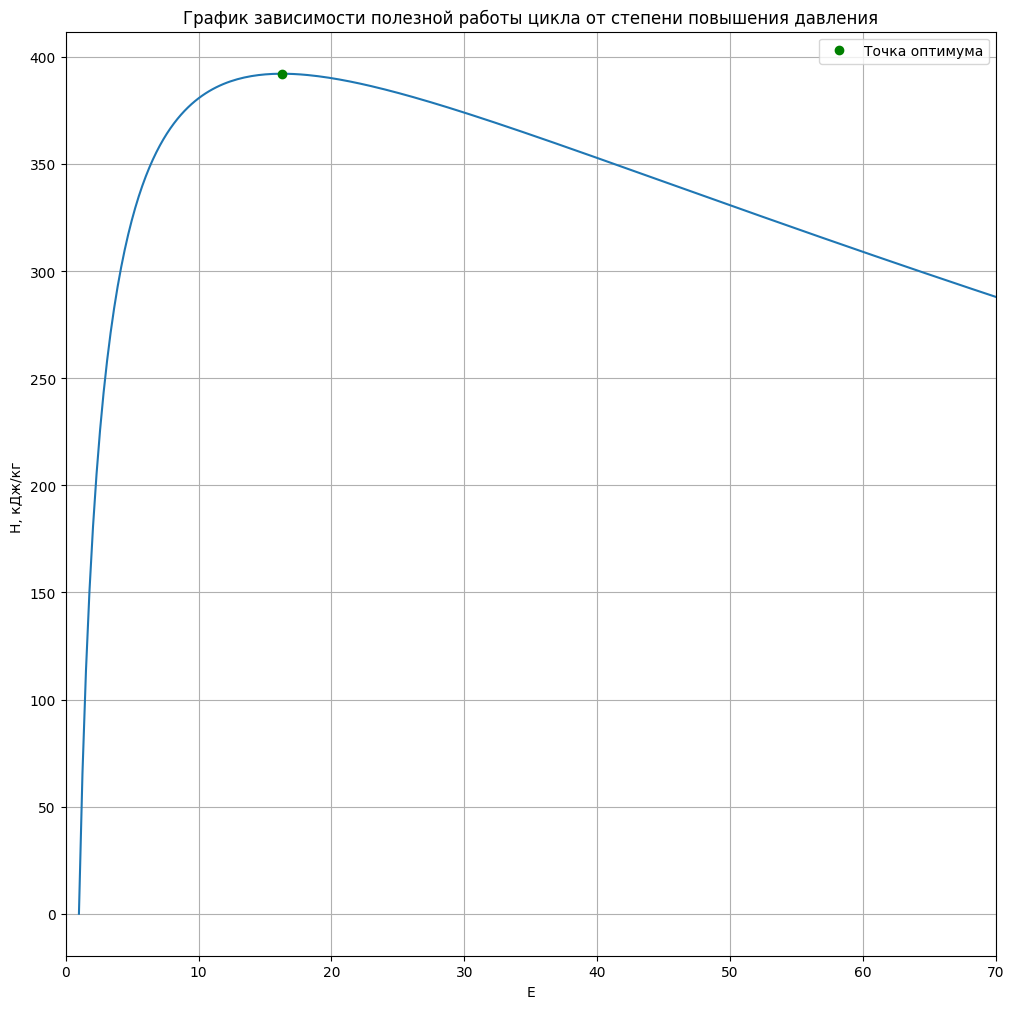

In [50]:
E_max_1200 = E_max[6]
shag_1200 = shag[6]
tau_1200 = tau[6]
fig, graf = plt.subplots(1, 1, figsize=(12, 12))
H = []
eps = []
for E in np.arange(1,E_max_1200,shag_1200):
  eps_value = (E) 
  H_t = Cp * (t_c[6] +273.15) * (1 - E ** (-m)) * effeckt_t
  H_k = Cp * (t_a +273.15) * ((E ** m) - 1) / effeckt_k
  H_value = (H_t - H_k)/1000
  H.append(H_value)
  eps.append(eps_value)
eps_opt = (tau_1200 * effeckt_k * effeckt_t) ** (1/(2 * m))

H_t = Cp * (t_c[6] +273.15) * (1 - eps_opt ** (-m)) * effeckt_t
H_k = Cp * (t_a +273.15) * ((eps_opt ** m) - 1) / effeckt_k
H_max = (H_t - H_k)/1000
graf.set_title("График зависимости полезной работы цикла от степени повышения давления")
graf.set_xlabel("E")
graf.set_ylabel("H, кДж/кг ")
graf.set_xlim(0, 70)
graf.plot(eps,H)

graf.plot(eps_opt,H_max , 'go' ,label = f"Точка оптимума")
graf.grid()
graf.legend();